# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Importing data set 

In [2]:
dt=pd.read_csv('usa.csv')
x=dt.iloc[:,1:]
y=dt.iloc[:,0]
print(dt,x,y)

     admit    gre   gpa  ses  Gender_Male  Race  rank
0        0  380.0  3.61  1.0          0.0     3   3.0
1        1  660.0  3.67  2.0          0.0     2   3.0
2        1    NaN  4.00  2.0          0.0     2   1.0
3        1  640.0  3.19  1.0          1.0     2   4.0
4        0  520.0  2.93  3.0          1.0     2   4.0
..     ...    ...   ...  ...          ...   ...   ...
395      0  620.0  4.00  2.0          0.0     2   2.0
396      0  560.0  3.04  2.0          0.0     1   3.0
397      0  460.0  2.63  3.0          0.0     2   2.0
398      0  700.0  3.65  1.0          1.0     1   2.0
399      0  600.0  3.89  2.0          1.0     3   3.0

[400 rows x 7 columns]        gre   gpa  ses  Gender_Male  Race  rank
0    380.0  3.61  1.0          0.0     3   3.0
1    660.0  3.67  2.0          0.0     2   3.0
2      NaN  4.00  2.0          0.0     2   1.0
3    640.0  3.19  1.0          1.0     2   4.0
4    520.0  2.93  3.0          1.0     2   4.0
..     ...   ...  ...          ...   ...   ...

# Data Science operations
### 1) Finding and managing the missing vlaues

In [3]:
x.isnull().sum()

gre            2
gpa            1
ses            1
Gender_Male    1
Race           0
rank           1
dtype: int64

In [4]:
# perfomring operations from columns 0 to 3

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer1 = imputer.fit(x.iloc[0:,0:4])
x.iloc[0:,0:4] = imputer1.transform(x.iloc[0:,0:4])

In [5]:
x.isnull().sum()

gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           1
dtype: int64

In [6]:
# performing operations(missing values) on the rank column

imputer=SimpleImputer(missing_values=np.nan , strategy='mean')
imputer1=imputer.fit(x.iloc[:,:])
x.iloc[:,:]=imputer1.transform(x.iloc[:,:])

In [7]:
x.isnull().sum()
print(x)

            gre   gpa  ses  Gender_Male  Race  rank
0    380.000000  3.61  1.0          0.0   3.0   3.0
1    660.000000  3.67  2.0          0.0   2.0   3.0
2    602.261307  4.00  2.0          0.0   2.0   1.0
3    640.000000  3.19  1.0          1.0   2.0   4.0
4    520.000000  2.93  3.0          1.0   2.0   4.0
..          ...   ...  ...          ...   ...   ...
395  620.000000  4.00  2.0          0.0   2.0   2.0
396  560.000000  3.04  2.0          0.0   1.0   3.0
397  460.000000  2.63  3.0          0.0   2.0   2.0
398  700.000000  3.65  1.0          1.0   1.0   2.0
399  600.000000  3.89  2.0          1.0   3.0   3.0

[400 rows x 6 columns]


### 2) finding and eliminating the outliers
####      we can do this by using IQR or Z-score methods

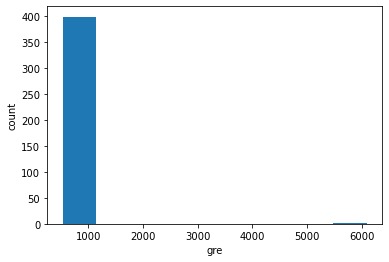

In [8]:
# finding outliers in gre column

py.hist(x.gre,bins=5,rwidth=0.5)
py.xlabel('gre')
py.ylabel('count')
py.show()

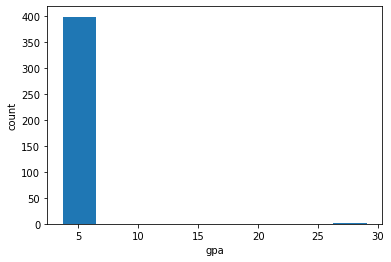

In [9]:
# finding outliers in gpa column

py.hist(x.gpa,bins=5,rwidth=0.5)
py.xlabel('gpa')
py.ylabel('count')
py.show()

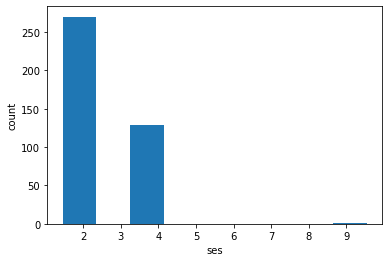

In [10]:
# finding outliers in ses column

py.hist(x.ses,bins=5,rwidth=0.5)
py.xlabel('ses')
py.ylabel('count')
py.show()

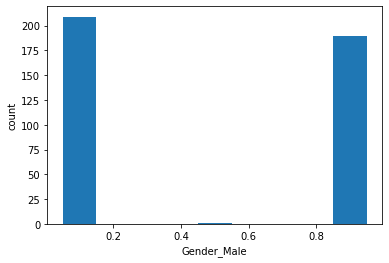

In [11]:
# finding outliers in Gender_Male column

py.hist(x.Gender_Male,bins=5,rwidth=0.5)
py.xlabel('Gender_Male')
py.ylabel('count')
py.show()

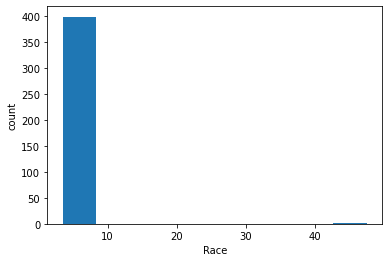

In [12]:
# finding outliers in Race column

py.hist(x.Race,bins=5,rwidth=0.5)
py.xlabel('Race')
py.ylabel('count')
py.show()

In [13]:
#changing Rank from rank because x have the pre-defined method name rank and there is a possibilty of getting an error

x["Rank"]=x['rank']
x.drop(['rank'],axis='columns')

,gre,gpa,ses,Gender_Male,Race,Rank
0,380.000000,3.61,1.0,0.0,3.0,3.0
1,660.000000,3.67,2.0,0.0,2.0,3.0
2,602.261307,4.00,2.0,0.0,2.0,1.0
3,640.000000,3.19,1.0,1.0,2.0,4.0
4,520.000000,2.93,3.0,1.0,2.0,4.0
...,...,...,...,...,...,...
395,620.000000,4.00,2.0,0.0,2.0,2.0
396,560.000000,3.04,2.0,0.0,1.0,3.0
397,460.000000,2.63,3.0,0.0,2.0,2.0
398,700.000000,3.65,1.0,1.0,1.0,2.0


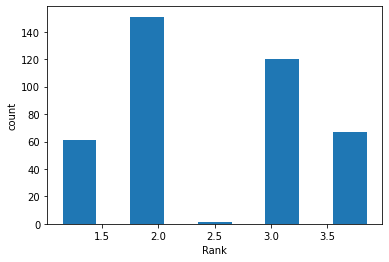

In [14]:
# finding outliers in Rank column

py.hist(x.Rank,bins=5,rwidth=0.5)
py.xlabel('Rank')
py.ylabel('count')
py.show()


In [15]:
outlier_col=['gre','gpa','ses','Race']
x.drop("rank",inplace=True,axis=1)
print(x)
print(y)
data=x.copy()
print(data)

            gre   gpa  ses  Gender_Male  Race  Rank
0    380.000000  3.61  1.0          0.0   3.0   3.0
1    660.000000  3.67  2.0          0.0   2.0   3.0
2    602.261307  4.00  2.0          0.0   2.0   1.0
3    640.000000  3.19  1.0          1.0   2.0   4.0
4    520.000000  2.93  3.0          1.0   2.0   4.0
..          ...   ...  ...          ...   ...   ...
395  620.000000  4.00  2.0          0.0   2.0   2.0
396  560.000000  3.04  2.0          0.0   1.0   3.0
397  460.000000  2.63  3.0          0.0   2.0   2.0
398  700.000000  3.65  1.0          1.0   1.0   2.0
399  600.000000  3.89  2.0          1.0   3.0   3.0

[400 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64
            gre   gpa  ses  Gender_Male  Race  Rank
0    380.000000  3.61  1.0          0.0   3.0   3.0
1    660.000000  3.67  2.0          0.0   2.0   3.0
2    602.261307  4.00  2.0          0.0   2.0   1.0
3    6

#### using z-score method
#### formula z=(i-mean)/std

In [16]:
# here by using the z-score method we gonna indentify the outliers and we will eliminate that particular row
# where the outlier is present

# and to note that in our x dataframe we do not have the coulmn admit in it 
# soo here the problem arises because if we delete a outlier row from x then that particular row must also be deleted
# from the admit column too.

# soo to avoid this we will merge the admit column with x for this instance and after that we will seperate them again

x['admit']=y.values
print(x)

# now we can perform the operations

            gre   gpa  ses  Gender_Male  Race  Rank  admit
0    380.000000  3.61  1.0          0.0   3.0   3.0      0
1    660.000000  3.67  2.0          0.0   2.0   3.0      1
2    602.261307  4.00  2.0          0.0   2.0   1.0      1
3    640.000000  3.19  1.0          1.0   2.0   4.0      1
4    520.000000  2.93  3.0          1.0   2.0   4.0      0
..          ...   ...  ...          ...   ...   ...    ...
395  620.000000  4.00  2.0          0.0   2.0   2.0      0
396  560.000000  3.04  2.0          0.0   1.0   3.0      0
397  460.000000  2.63  3.0          0.0   2.0   2.0      0
398  700.000000  3.65  1.0          1.0   1.0   2.0      0
399  600.000000  3.89  2.0          1.0   3.0   3.0      0

[400 rows x 7 columns]


In [17]:
data=x.copy()
def z(x):
    outliers=[]
    mean=np.mean(x)
    std=np.std(x)
    s=3
    for i in x:
        z_score=(i - mean)/std
        if np.abs(z_score) > s:
            outliers.append(i)
    return outliers
for i in outlier_col:
    x1=data[i].values
    x1=z(x1)
    print(x1)
    print(data[i] != x1[0])
    data=data[(data[i] != x1[0])]

[6400.0]
0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: gre, Length: 400, dtype: bool
[30.49]
0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: gpa, Length: 399, dtype: bool
[10.0]
0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: ses, Length: 398, dtype: bool
[50.0]
0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: Race, Length: 397, dtype: bool


In [18]:
print(data)

            gre   gpa  ses  Gender_Male  Race  Rank  admit
0    380.000000  3.61  1.0          0.0   3.0   3.0      0
1    660.000000  3.67  2.0          0.0   2.0   3.0      1
2    602.261307  4.00  2.0          0.0   2.0   1.0      1
3    640.000000  3.19  1.0          1.0   2.0   4.0      1
4    520.000000  2.93  3.0          1.0   2.0   4.0      0
..          ...   ...  ...          ...   ...   ...    ...
395  620.000000  4.00  2.0          0.0   2.0   2.0      0
396  560.000000  3.04  2.0          0.0   1.0   3.0      0
397  460.000000  2.63  3.0          0.0   2.0   2.0      0
398  700.000000  3.65  1.0          1.0   1.0   2.0      0
399  600.000000  3.89  2.0          1.0   3.0   3.0      0

[396 rows x 7 columns]


In [19]:
x=data.iloc[:,:6]
y=data.iloc[:,6:]
print(x,y)

            gre   gpa  ses  Gender_Male  Race  Rank
0    380.000000  3.61  1.0          0.0   3.0   3.0
1    660.000000  3.67  2.0          0.0   2.0   3.0
2    602.261307  4.00  2.0          0.0   2.0   1.0
3    640.000000  3.19  1.0          1.0   2.0   4.0
4    520.000000  2.93  3.0          1.0   2.0   4.0
..          ...   ...  ...          ...   ...   ...
395  620.000000  4.00  2.0          0.0   2.0   2.0
396  560.000000  3.04  2.0          0.0   1.0   3.0
397  460.000000  2.63  3.0          0.0   2.0   2.0
398  700.000000  3.65  1.0          1.0   1.0   2.0
399  600.000000  3.89  2.0          1.0   3.0   3.0

[396 rows x 6 columns]      admit
0        0
1        1
2        1
3        1
4        0
..     ...
395      0
396      0
397      0
398      0
399      0

[396 rows x 1 columns]


In [20]:
data=x.copy()
data['gre'].describe()

count    396.000000
mean     587.233643
std      114.373032
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [27]:
# performing feature scaling techniques to scale down the data
# the most popular methods used in feature scaling are
# 1-> MinMaxScaler 2-> StandardScaler
data=x.copy()
lis=list(data.columns)
# scale=StandardScaler()
# scale.fit(data[lis])
# data=pd.DataFrame(scale.transform(data[lis]),columns=lis)
# print(data.describe())

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(data[lis])
# data=pd.DataFrame(scale.transform(data[lis]),columns=lis)
# print(data.describe())
# print(data)

# saving the model for future scaling on the prediction data
import pickle
pickle.dump(scale,open('scaling_model.pkl','wb'))
scale=pickle.load(open('scaling_model.pkl','rb'))
data=pd.DataFrame(scale.transform(data[lis]),columns=lis)
print(data.describe())
print(data)

              gre         gpa         ses  Gender_Male        Race        Rank
count  396.000000  396.000000  396.000000   396.000000  396.000000  396.000000
mean     0.633161    0.649946    0.498760     0.473425    0.483586    0.495357
std      0.197195    0.218860    0.403307     0.499293    0.410752    0.315860
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.517241    0.500000    0.000000     0.000000    0.000000    0.333333
50%      0.620690    0.655172    0.500000     0.000000    0.500000    0.333333
75%      0.758621    0.810345    1.000000     1.000000    1.000000    0.666667
max      1.000000    1.000000    1.000000     1.000000    1.000000    1.000000
          gre       gpa  ses  Gender_Male  Race      Rank
0    0.275862  0.775862  0.0          0.0   1.0  0.666667
1    0.758621  0.810345  0.5          0.0   0.5  0.666667
2    0.659071  1.000000  0.5          0.0   0.5  0.000000
3    0.724138  0.534483  0.0          1.0   0.5  1.000000

In [278]:
x=data.copy()
print(x)
print(y)

          gre       gpa  ses  Gender_Male  Race      Rank
0    0.275862  0.775862  0.0          0.0   1.0  0.666667
1    0.758621  0.810345  0.5          0.0   0.5  0.666667
2    0.659071  1.000000  0.5          0.0   0.5  0.000000
3    0.724138  0.534483  0.0          1.0   0.5  1.000000
4    0.517241  0.385057  1.0          1.0   0.5  1.000000
..        ...       ...  ...          ...   ...       ...
391  0.689655  1.000000  0.5          0.0   0.5  0.333333
392  0.586207  0.448276  0.5          0.0   0.0  0.666667
393  0.413793  0.212644  1.0          0.0   0.5  0.333333
394  0.827586  0.798851  0.0          1.0   0.0  0.333333
395  0.655172  0.936782  0.5          1.0   1.0  0.666667

[396 rows x 6 columns]
     admit
0        0
1        1
2        1
3        1
4        0
..     ...
395      0
396      0
397      0
398      0
399      0

[396 rows x 1 columns]


# checking the data is balanced or not

<AxesSubplot:xlabel='admit'>

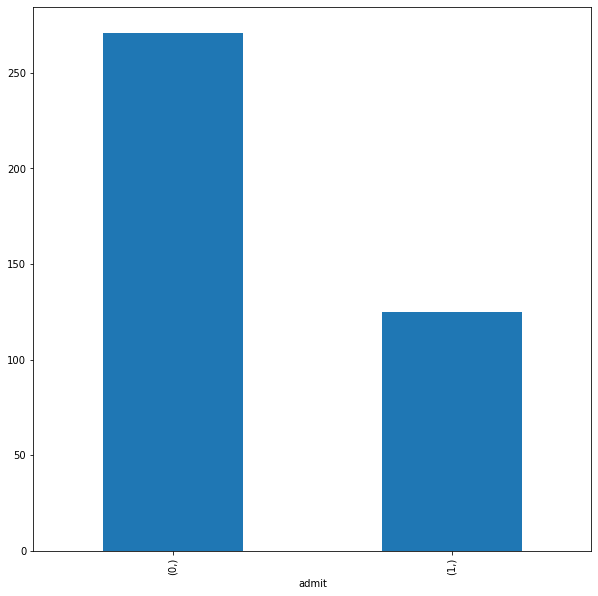

In [279]:
y.value_counts().plot(kind='bar',figsize=(10,10))

In [280]:
yes=y[y.values==1]
no=y[y.values==0]
print(yes.shape,no.shape)


(125, 1) (271, 1)


In [281]:
# we can see that the data is imbalanced and we can make it a balanced dataset 
# by performing undersampling,oversampling,SMOTETotek 

#performing oversampling technique to balance the data


os=RandomOverSampler()
X,Y=os.fit_resample(x,y)
print(X.shape,Y.shape)

(542, 6) (542, 1)


<AxesSubplot:xlabel='admit'>

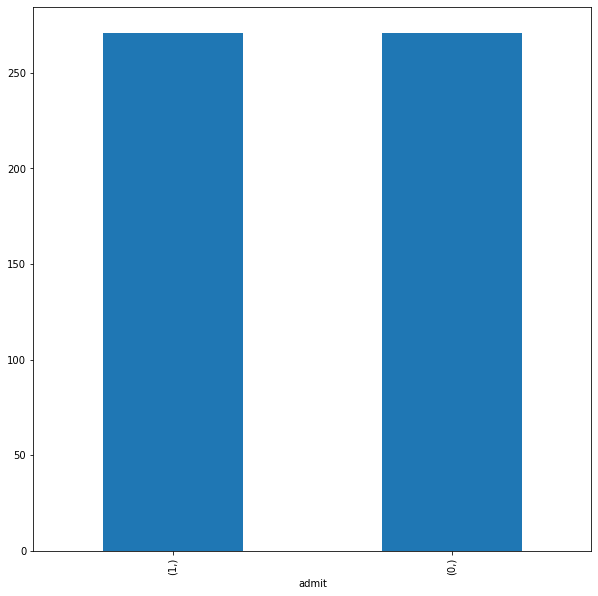

In [282]:
Y.value_counts().plot(kind='bar',figsize=(10,10))

In [283]:
# X1=X.drop(['admit'],axis='columns')
# X1=X1.drop(['rank'],axis='columns')
# Y1=Y.copy()
print(X,Y)

          gre       gpa  ses  Gender_Male  Race      Rank
0    0.275862  0.775862  0.0          0.0   1.0  0.666667
1    0.758621  0.810345  0.5          0.0   0.5  0.666667
2    0.659071  1.000000  0.5          0.0   0.5  0.000000
3    0.724138  0.534483  0.0          1.0   0.5  1.000000
4    0.517241  0.385057  1.0          1.0   0.5  1.000000
..        ...       ...  ...          ...   ...       ...
537  0.724138  0.787356  1.0          1.0   0.0  0.000000
538  0.379310  0.683908  0.0          1.0   1.0  0.333333
539  0.827586  0.747126  1.0          1.0   0.5  0.333333
540  0.517241  1.000000  0.0          0.0   0.0  0.000000
541  0.689655  0.971264  0.0          0.0   0.0  0.666667

[542 rows x 6 columns]      admit
0        0
1        1
2        1
3        1
4        0
..     ...
537      1
538      1
539      1
540      1
541      1

[542 rows x 1 columns]


## Building the model (SVC)
#### before building the model we have to know the perfect hyperparameters to use 
#### so that we can get a good accuracy . For that we are using HYPERPARAMETER TUNNING namely GridSearchCV

In [284]:
#internally GridSearchCV use the k-fold technique for training purpose

clf=GridSearchCV(SVC(gamma=10),{
    'C':[0.5,1,5],
    "kernel":['rbf','linear']
},cv=5,
return_train_score=False)

clf.fit(X,Y)
clf.cv_results_

/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{'mean_fit_time': array([0.01362095, 0.00584702, 0.00810404, 0.00634985, 0.00872221,
        0.0066021 ]),
 'std_fit_time': array([5.08187183e-03, 1.21814620e-04, 1.70743222e-04, 1.97057097e-04,
        9.96339347e-05, 2.29111665e-04]),
 'mean_score_time': array([0.00500793, 0.00209169, 0.00346851, 0.00224071, 0.00308371,
        0.00213728]),
 'std_score_time': array([1.96375963e-03, 4.05926518e-05, 5.25274602e-05, 1.49917132e-04,
        1.25856649e-04, 7.12428226e-05]),
 'param_C': masked_array(data=[0.5, 0.5, 1, 1, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.5, 'kernel': 'rbf'},
  {'C': 0.5, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 5, 'ke

In [285]:
df=pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.5,rbf,0.712198
1,0.5,linear,0.651274
2,1,rbf,0.736171
3,1,linear,0.647571
4,5,rbf,0.767550
5,5,linear,0.653143


In [286]:
#here we are spliting our dataset into training and testing sets

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(x_train,x_test,y_train,y_test)

          gre       gpa  ses  Gender_Male  Race      Rank
211  0.655172  0.747126  1.0          0.0   0.0  0.333333
500  0.448276  0.235632  0.0          0.0   0.0  0.333333
497  0.655172  0.936782  0.0          0.0   0.5  0.000000
10   1.000000  1.000000  0.0          1.0   0.0  1.000000
475  0.793103  0.580460  0.5          0.0   0.5  0.333333
..        ...       ...  ...          ...   ...       ...
70   0.448276  0.649425  0.5          0.0   0.5  1.000000
277  0.758621  0.965517  0.5          1.0   0.0  0.333333
9    0.827586  0.954023  0.0          0.0   0.5  0.333333
359  0.793103  0.505747  0.0          1.0   0.0  0.333333
192  0.655172  0.695402  0.0          0.0   0.5  0.333333

[433 rows x 6 columns]           gre       gpa  ses  Gender_Male  Race      Rank
380  0.448276  0.206897  0.5          1.0   0.0  0.333333
155  0.448276  0.758621  0.0          1.0   0.0  0.000000
132  0.586207  0.396552  1.0          1.0   0.0  0.333333
456  0.448276  0.235632  0.0          0.0   0.0 

### after knowing the hyperparameters from the GridSearchCV
### we are going to build the model 

In [287]:
# intializing the clf to SVC
clf=SVC(kernel='rbf',C=5,gamma=10)

#fiting the data
clf.fit(x_train,y_train)

# testing the accuracy of the model
clf.score(x_test,y_test)

/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7798165137614679

In [300]:
# predicting the sample data
sample=[520,2.93,3,1,2,4]
pred=clf.predict(scale.transform([sample]))

/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [301]:
print(pred[0])

0


In [302]:
if pred[0]==1:
    print("YES")
else:
    print("NO")

NO


## The student got admitted